Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Adriana Carolina Gonzalez-Cavazos"
COLLABORATORS = ""

---

# Homework 4: Data Analysis and Plotting in R
Curated by Sabah Ul-Hasan, Karthik Gangavarapu, Shang-Fu Chen, Huitian Dao, and Andrew Su

Complete homework is due every Tuesday at 8 AM PST. <br>
Save your homework as you go, so the efforts don't get lost. <br>
Note there are up 12 points, but you can only receive 10 points total for homework.

In this assignment, you will <br>
A4.aa Solidfy your understanding of R syntax and loops <br>
A4.ab Explore basic data analysis in R <br>
A4.ba Create R scripts that output figures based on data analysis <br>
A4.bb Solidfy your understanding of data analysis and visualizatoin in R by practice

Note that there is a section at the end (A4.bb) to point out any enhancements you personally would make to this assignment if you were to lead the course. 


<font color = 'red' size = "4"><b>NOTE: Execute the code cell below to import the `testthat` library before you started working on the questions.</b></font>

In [1]:
# Import the required R library for test case and autograding
library(testthat)

## A4.aa: Solidfy your understanding of R syntax and loops [20-30 min] Group of 3 

### Question 1 (1 point)

1. Code review: Take turns briefly talking through your code and process (3-5 min), then spend the remaining time discussing the different approaches you may have taken to get to the same end-goal. What were the interesting aspects you learned from each other? Share your notes below. Include your assessment of how loops compare in bash vs R.  
1. For the last 5 minutes on your own, think of a suggestion of something you would've liked to learn in relation to these topics that we didn't cover.

Use substring to get the first 100 digits of pi. 
Use lapply to evaluate class of each column of dataframe. 
Create a list outside the for loop to save results from evaluation. <br>
Suggestion: Learn about each function in separate question and then integrete all together in 1 question 

## A4.ab: Explore basic data analysis in R [20-30 min] Individual
#### ab.i Uploading and exploring your data<br>

### Question 2 (1 point)

1. Using R script, read the `NAV-D14_DEseq2.csv` file into your notebook as `nav.d14`, save the first 6 rows of the dataframe to a variable named `nav.d14.6` 
1. Sort the full dataframe by ascending __adjusted__ $p$-value, save the top 10 rows to `nav.d14.sorted.padj.10`  
1. How big is the dataframe? Save your answer to `nav.d14.shape`  

_(Hint: `read.csv()`, `read.table()`, `head()`, `order()`, `dim()`)_  

In [20]:
#Answer 1
setwd ('/gpfs/home/agonzalez/HW4/data')
nav.d14 <- read.csv('NAV-D14_DEseq2.csv')
nav.d14.6 <- nav.d14[1:6,]
nav.d14.6

#Answer 2
nav.d14.sorted.padj <- nav.d14[order(nav.d14$padj),]
nav.d14.sorted.padj.10 <- head(nav.d14.sorted.padj, 10)
nav.d14.sorted.padj.10

#Answer 3
nav.d14.shape <- dim (nav.d14)
nav.d14.shape

,gene.name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TSPAN6,25.256745,1.30246882,0.4166710,3.1258926,1.772662e-03,8.209295e-03
2,TNMD,0.288508,-0.05077872,0.4875003,-0.1041614,9.170413e-01,NA
3,DPM1,163.507773,-0.05502833,0.2492486,-0.2207769,8.252662e-01,9.144493e-01
4,SCYL3,296.461713,0.27370099,0.1964251,1.3934117,1.634953e-01,3.312390e-01
5,C1orf112,199.011986,-1.62012005,0.2833121,-5.7184998,1.070000e-08,1.590000e-07
6,FGR,122.792530,-5.60936805,0.6378324,-8.7944226,1.440000e-18,7.150000e-17


,gene.name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
469,TNFRSF1B,542.82545,-3.406411,0.2267235,-15.024517,5.07e-51,3.25e-48
394,CD74,2666.66747,-3.133593,0.2146900,-14.595896,2.98e-48,1.54e-45
460,SLAMF7,796.08484,-5.924170,0.4107372,-14.423262,3.69e-47,1.85e-44
298,ANLN,86.61972,-4.292672,0.3590313,-11.956260,6.02e-33,1.02e-30
197,E2F2,56.39916,-5.011194,0.4223203,-11.865862,1.78e-32,2.95e-30
76,SLC25A5,839.58682,-1.630522,0.1549378,-10.523717,6.72e-26,6.58e-24
482,HMGB3,84.36925,-4.387288,0.4200637,-10.444341,1.56e-25,1.45e-23
51,CD38,651.92593,-2.934379,0.2850409,-10.294588,7.45e-25,6.55e-23
319,ELOVL5,602.36494,-1.761169,0.1792978,-9.822591,9.00e-23,6.50e-21


[1] 500   7

In [16]:
test_that("A1 should be a dataframe", {
    expect_that(nav.d14.6, is_a("data.frame"))
})

In [17]:
test_that("A2 should be a dataframe", {
    expect_that(nav.d14.sorted.padj.10, is_a("data.frame"))
})
test_that("A2 should have more rows than A1", {
    expect_that(length(rownames(nav.d14.sorted.padj.10)) > length(rownames(nav.d14.6)), is_true())
})

In [18]:
test_that("A3 should have 2 values", {
    expect_that(length(nav.d14.shape) == 2, is_true())
})

#### ab.ii Analyzing and appending your data

### Question 3 (1 point)

1. Create a function named `pType` to retun the type of $p$-value by following rules.
```ruby
# p-value types
missing : NA
p > 0.05 : 'n.s.'
0.05 >= p > 0.01 : '*'
0.01 >= p > 0.001 : '**'
0.001 >= p > 0.0001 : '***'
0.0001 >= p : '****'
``` 
2. Use `pType` with `lapply` to get the type of all values in the $p$-value column (not `padj`) in `nav.d14`. Save the summary counts of each type (as factors) to `nav.d14.summary` 
3. Assign types of $p$-value to a new column named `ptype` to the same dataframe. (Note: you might have to reload the csv file as Question 1, if you accidentally edit the dataframe in a wrong way.)  
_(Hint: `lapply()`, `factor()`, `unlist()`, `summary()`)_

In [24]:
pType <- function (p) {
    if (is.na(p)==TRUE) {  #Check NA values 
       return (NA)
    }
    else if (p > 0.05) {
        return ("n.s.")
    }
    else if (p > 0.01 & 0.05 >= p) {
         return ("*")
    }
    else if (p > 0.001 & 0.01 >= p) {
        return ("**")
    }

    else if (p > 0.0001 & 0.001 >= p) {
        return  ("***")
    }
    else  {
        return ("****")
        }   
}

In [25]:
nav.d14_pType <- unlist(lapply(nav.d14$pvalue,pType))
nav.d14.summary <- summary(as.factor(nav.d14_pType))
nav.d14.summary # display A2


nav.d14<- cbind(nav.d14, ptype= nav.d14_pType) 
head(nav.d14) # display partial A3

*   **  *** **** n.s. NA's 
  37   34   25   93  306    5

,gene.name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,ptype
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,TSPAN6,25.256745,1.30246882,0.4166710,3.1258926,1.772662e-03,8.209295e-03,**
2,TNMD,0.288508,-0.05077872,0.4875003,-0.1041614,9.170413e-01,NA,n.s.
3,DPM1,163.507773,-0.05502833,0.2492486,-0.2207769,8.252662e-01,9.144493e-01,n.s.
4,SCYL3,296.461713,0.27370099,0.1964251,1.3934117,1.634953e-01,3.312390e-01,n.s.
5,C1orf112,199.011986,-1.62012005,0.2833121,-5.7184998,1.070000e-08,1.590000e-07,****
6,FGR,122.792530,-5.60936805,0.6378324,-8.7944226,1.440000e-18,7.150000e-17,****


In [26]:
test_that("test missing p-value", {
    expect_that(pType(NA), is_a("logical"))
})
test_that("test p-values", {
    expect_that(all(pType(0.1) == 'n.s.', pType(0.05) == '*', 
                    pType(0.01) == '**', pType(0.001) == '***', 
                    pType(0.0001) == '****'), is_true())
})

In [27]:
test_that("A1: test type counts in the summary", {
    expect_that(all(nav.d14.summary[['NA\'s']] == 5, 
                    nav.d14.summary[['n.s.']] == 306, 
                    nav.d14.summary[['****']] == 93,
                    nav.d14.summary[['***']] == 25,
                    nav.d14.summary[['**']] == 34,
                    nav.d14.summary[['*']] == 37
                   ), is_true())
})

In [28]:
test_that("A2: test the shape of the result dataframe", {
    expect_that(all(dim(nav.d14) == c(500, 8)), is_true())
})
test_that("A2: test the first 10 components in the ptype column", {
    expect_that(all(nav.d14$ptype[1:10] == c('**', 'n.s.', 'n.s.', 'n.s.', '****', 
                                             '****', 'n.s.', '**', '**', 'n.s.')), is_true())
})

4. Describe how a function works. What is the distinction between creating your own function versus the ones already included in base R?

Compared to the functions included in base R, by creating a new function we can define multiple arguments of interest, costumize the actions according to the desire output.  

### Question 4 (1 point)

How do we know what a function is doing? For example, what are the parameters of the built-in R function `sqrt()` that result in the squareroot of any given input number? Write the breakdown of this specifc base R arithmatic function as if you were to create it from scratch. Include comments in your code of what is happening line-by-line with a test that it print the same output as you would in base R at the end.  
_(Hint: You should consider any type of input and special return for a few magic numbers if needed.)_

YOUR ANSWER HERE

#### ab.iii Understanding functions, tests, and loops by practice (on your own time)


### Question 5 (1 point)


1. Follow and complete the two tutorials. Use this space to take notes of what you learned <br>
https://swcarpentry.github.io/r-novice-inflammation/02-func-R/index.html <br>
https://swcarpentry.github.io/r-novice-inflammation/03-loops-R/index.html
1. Reflections: On an integer scale of `1-5`, `1` being very easy and `5` being the most difficult, where would you rank today's exercises? Provide brief notes on what was easy vs difficult, and why. <br>


CREATING FUNCTIONS
- Syntax of making a function {}, arguments. 
- Arguments: 
    - We can define more than one argument. 
    - Default value: It could also be variables previously defined. 
- Call a function (): 
    -Arguments matched by name (partial) or position
    -Arguments not given, takes the default value

TEST FUNCTIONS 
- Possible errors should be informative 

DOCUMENTATION 
- Include comments into the function. 
- Formal documentation written in .Rd files. 


PROCESSING MULTIPLE FILES 
- Function: list.file (path,pattern)
- Use for loop to repeat operations on multiple specific files. 

Reflections: 3. It wasnt difficult to create the function but it toke me some time to figure it out how to use the created function on each value of the column. Need more practice to get more familiar with  all the functions. 

## A4.ba: Create R scripts that output figures based on data analysis [20-30 min] TPS

### Question 6 (1 point) [15 min on your own]

Load the `games.csv` dataset. Make a scatter plot including legend as below - to visualize the rating between charcoal vs cream, color by winner side.  

<img src="data/A4_Q6.png" style="width: 500px;">

In [29]:
setwd ('/gpfs/home/agonzalez/HW4/data')
games_data <- read.csv("games.csv")
head(games_data)

,rated,turns,victory_status,winner,increment_code,cream_rating,charcoal_rating,opening_name
,<lgl>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>
1,FALSE,13,outoftime,cream,15+2,1500,1191,Slav Defense: Exchange Variation
2,TRUE,16,resign,charcoal,5+10,1322,1261,Nimzowitsch Defense: Kennedy Variation
3,TRUE,61,mate,cream,5+10,1496,1500,King's Pawn Game: Leonardis Variation
4,TRUE,61,mate,cream,20+0,1439,1454,Queen's Pawn Game: Zukertort Variation
5,TRUE,95,mate,cream,30+3,1523,1469,Philidor Defense
6,FALSE,5,draw,draw,10+0,1250,1002,Sicilian Defense: Mongoose Variation


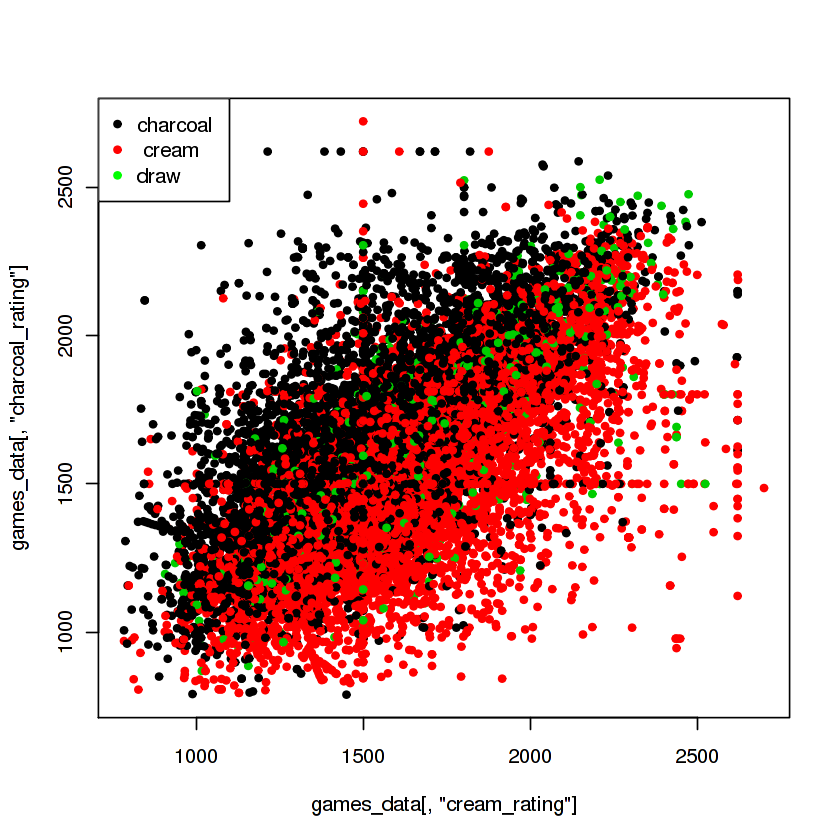

In [15]:
plot(games_data[,'cream_rating'], 
     games_data[,'charcoal_rating'],
     col=games_data[,'winner'],  #Assign color based on values in winner column.
      pch =20)

legend("topleft", 
legend = c("charcoal", " cream", "draw"), 
col = c("black", "red", "green"),  pch = 20)

### Question 7 (1 point) [15 min together] 

Discuss and compare your scripts, troubelshoot together. Write down your findings.

We didnt have time to discuss scripts. 

### A4.bb Solidfy your understanding by practice [20-30 min] Individual

### Question 8 (1 point)

Make a bar chart as below - showing the number of rated vs unrated games.

<img src="data/A4_Q8.png" style="width: 500px;">

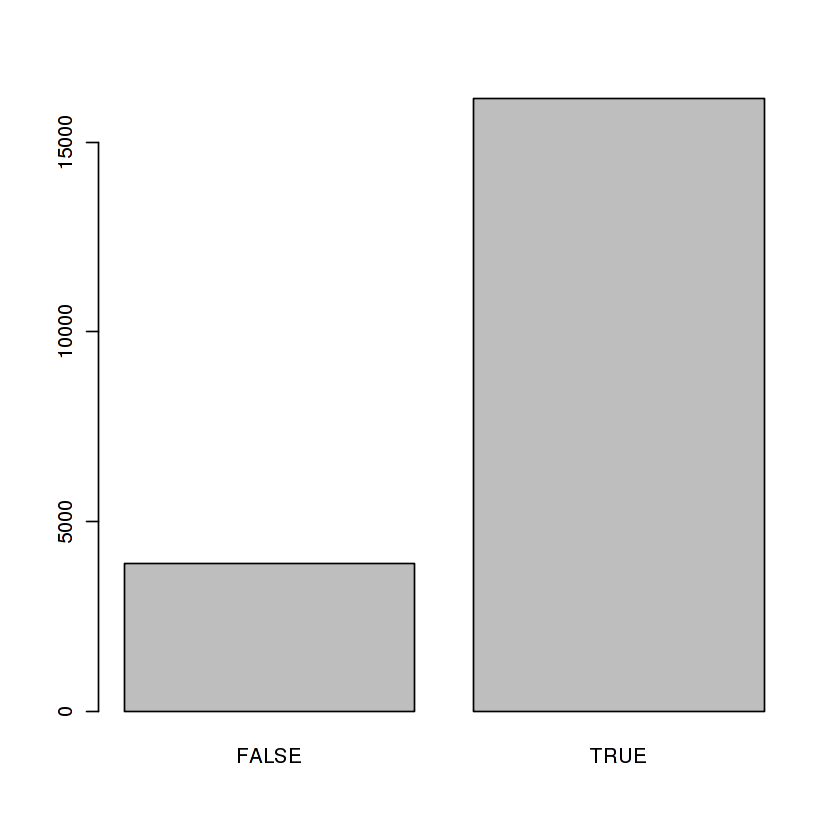

In [315]:
games_data_table <- table(games_data$rated)
barplot (games_data_table)

### Question 9 (1 point)

Make a stacked bar chart as below - futher coloring the bar by winner side.

<img src="data/A4_Q9.png" style="width: 500px;">

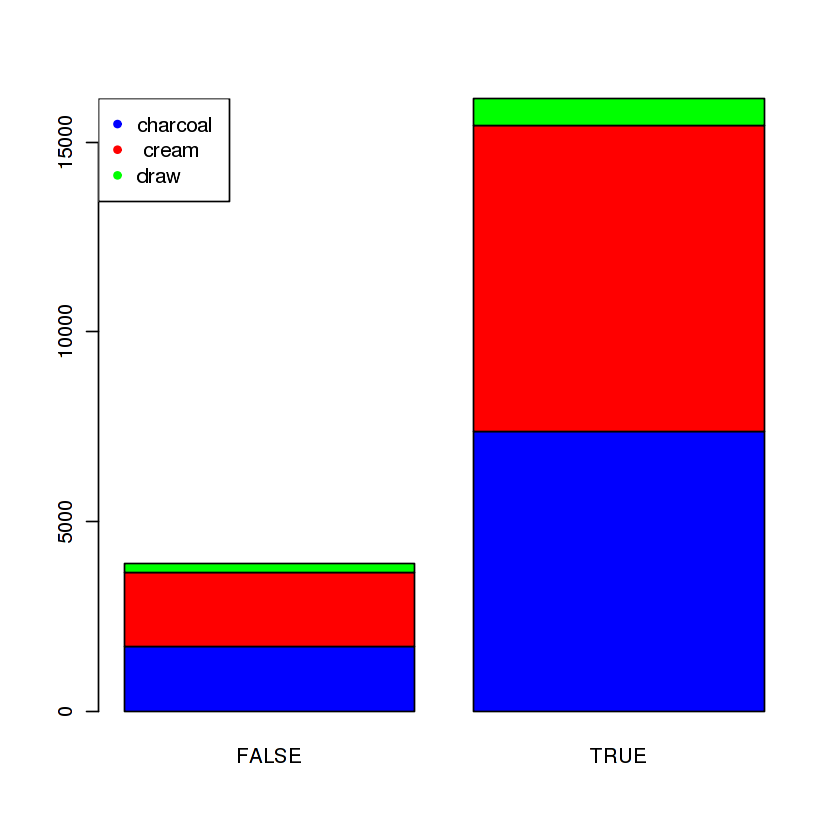

In [69]:
games_data_table2 <- table(games_data$winner, games_data$rated)

barplot (games_data_table2, col= c("blue", "red", "green"))
legend("topleft", 
  legend = c("charcoal", " cream", "draw"), 
  col = c("blue", "red", "green"), 
  pch = 20)

### Question 10 (1 point)

Make a boxplot as below - to see what type of victory __for cream__ had the highest median `cream_rating`?

<img src="data/A4_Q10.png" style="width: 500px;">

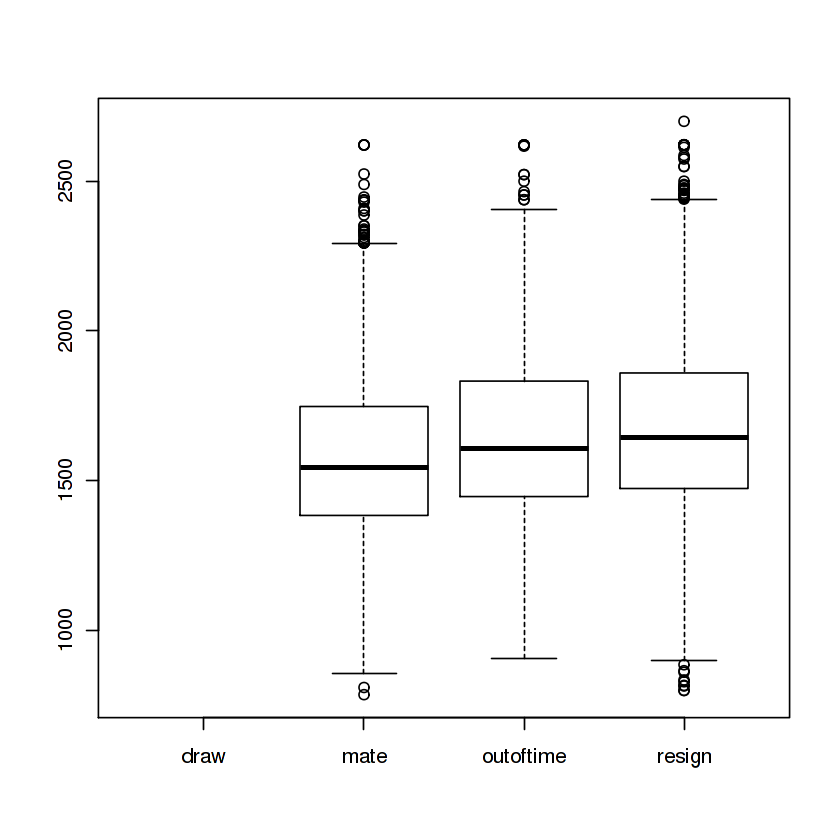

In [43]:
#Subset games_data based on "cream" value in "winner" column 
cream_winner<- games_data[games_data$winner == "cream",] 

#Boxplot: Rating types of victory for cream winner
boxplot(cream_winner$cream_rating ~ cream_winner$victory_status)

### Question 11 (1 point)

Advanced: Integrate your understanding of how to create function to output the plots in Question 8-10 as one. Make the 3 figures (no need to be a grid plot) by a customized function.  


In [231]:
any_plot<- function (data, #name of data frame
               plot, #bar or box
               subset = list(), # subset data based on (column, row) name. If necessary
               columns = list(), #List of columns to graph. 
               legend_graph = list (),#List names on the legend 
               colors = list ()) #List of colors for the graph and names on legend  
        
{
    
#Barplot 1 column 
    if (plot == "bar" & (length(columns) == 1) ){
        col_bar1 <- table(data[,columns])
        barplot(col_bar1)
    }
#Barplot 2 columns
    if (plot == "bar" & (length(columns) == 2)){
        col_bar2 <- table(data[,columns[1]],
                  data[,columns[2]])
    
     barplot(col_bar2,col= colors )
     legend("topleft", legend = legend_graph , col = colors , pch = 20 )
    }
    
#Boxplot
    if (plot == "box") {
        new_subset<- data[data[,subset[1]]== subset[2],] 
        boxplot(new_subset[,columns[1]] ~ new_subset[,columns[2]]) 
    }

}

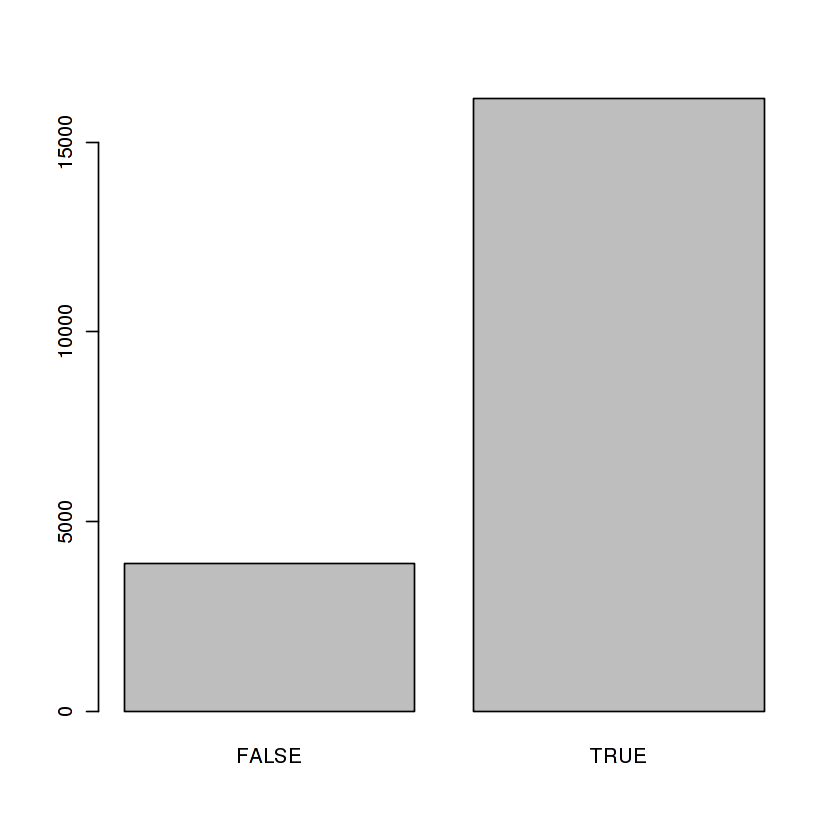

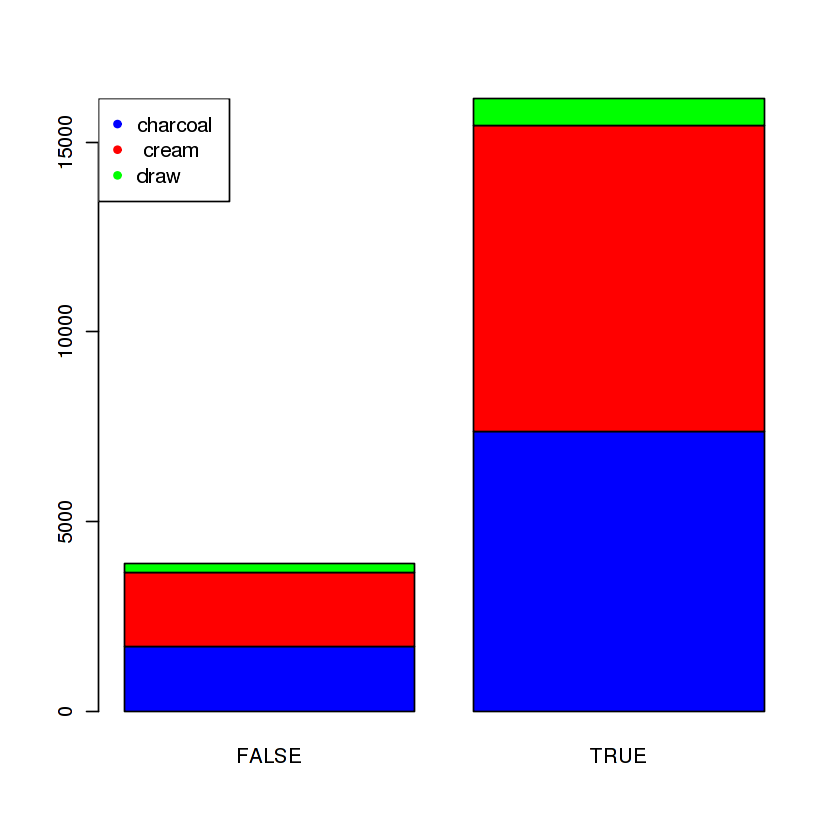

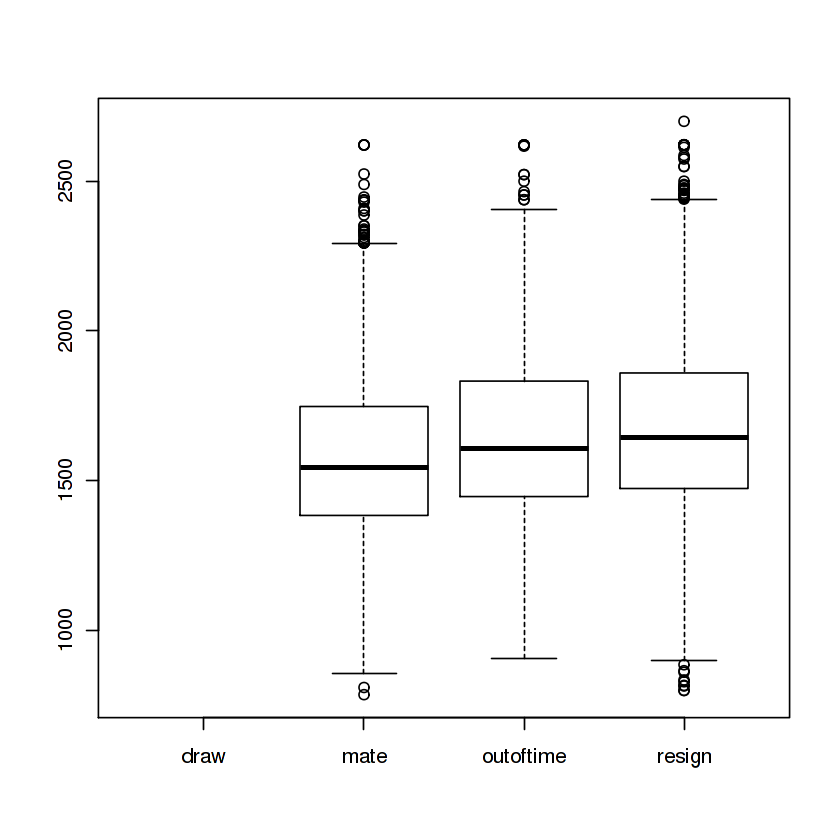

In [232]:
#Q8
any_plot (games_data, "bar", columns = c("rated"))

#Q9
any_plot(games_data, 
         "bar",
         columns = c("winner", "rated"), 
         colors = c("blue", "red", "green"), 
         legend_graph = c("charcoal", " cream", "draw"))

#Q10
any_plot (games_data, plot = "box", 
          subset= c("winner", "cream"), 
          columns = c ("cream_rating","victory_status"))

### Question 12 (1 point)

1. Reflections: On an integer scale of `1-5`, `1` being very easy and `5` being the most difficult, where would you rank the A1.bb assignment and why? Include some notes about what you gained from this past week that you didn't know before as well as notes of things you already knew.

1. Improvements: Notice a [potentially intentional] mistake, or an area of this homework that could have been improved? Include your thoughts here. 

Reflections: 3. Taking the experience from previous lessons about loops and subsetting data frames, in this lesson I was able to explore dataset to visualize it on different type of plots. <br>
Improvements: I couldn't think of an improvement. I really appreciate having hints and the display of the expected results. It gives me a better idea of how to approach questions. 